# 1.0 Getting movie links for scraping

In [33]:
# Get Soup
import requests
from bs4 import BeautifulSoup
import re
import dateutil.parser
from PIL import Image
import io
from urllib.request import urlopen
import time
import calendar

##Page list 
pagelist2015 = ['http://www.boxofficemojo.com/yearly/chart/?page=1&view=releasedate&view2=domestic&yr=2015&p=.htm','http://www.boxofficemojo.com/yearly/chart/?page=2&view=releasedate&view2=domestic&yr=2015&p=.htm','http://www.boxofficemojo.com/yearly/chart/?page=3&view=releasedate&view2=domestic&yr=2015&p=.htm','http://www.boxofficemojo.com/yearly/chart/?page=4&view=releasedate&view2=domestic&yr=2015&p=.htm','http://www.boxofficemojo.com/yearly/chart/?page=5&view=releasedate&view2=domestic&yr=2015&p=.htm','http://www.boxofficemojo.com/yearly/chart/?page=6&view=releasedate&view2=domestic&yr=2015&p=.htm','http://www.boxofficemojo.com/yearly/chart/?page=7&view=releasedate&view2=domestic&yr=2015&p=.htm']
pagelist2014 = ['http://www.boxofficemojo.com/yearly/chart/?yr=2014&adjust_yr=2015&p=.htm','http://www.boxofficemojo.com/yearly/chart/?page=2&view=releasedate&view2=domestic&yr=2014&adjust_mo=&adjust_yr=2015&p=.htm','http://www.boxofficemojo.com/yearly/chart/?page=3&view=releasedate&view2=domestic&yr=2014&adjust_mo=&adjust_yr=2015&p=.htm','http://www.boxofficemojo.com/yearly/chart/?page=4&view=releasedate&view2=domestic&yr=2014&adjust_mo=&adjust_yr=2015&p=.htm','http://www.boxofficemojo.com/yearly/chart/?page=5&view=releasedate&view2=domestic&yr=2014&adjust_mo=&adjust_yr=2015&p=.htm','http://www.boxofficemojo.com/yearly/chart/?page=6&view=releasedate&view2=domestic&yr=2014&adjust_mo=&adjust_yr=2015&p=.htm','http://www.boxofficemojo.com/yearly/chart/?page=7&view=releasedate&view2=domestic&yr=2014&adjust_mo=&adjust_yr=2015&p=.htm']
pagelist2013 = ['http://www.boxofficemojo.com/yearly/chart/?yr=2013&adjust_yr=2015&p=.htm','http://www.boxofficemojo.com/yearly/chart/?page=2&view=releasedate&view2=domestic&yr=2013&adjust_mo=&adjust_yr=2015&p=.htm','http://www.boxofficemojo.com/yearly/chart/?page=3&view=releasedate&view2=domestic&yr=2013&adjust_mo=&adjust_yr=2015&p=.htm','http://www.boxofficemojo.com/yearly/chart/?page=4&view=releasedate&view2=domestic&yr=2013&adjust_mo=&adjust_yr=2015&p=.htm','http://www.boxofficemojo.com/yearly/chart/?page=5&view=releasedate&view2=domestic&yr=2013&adjust_mo=&adjust_yr=2015&p=.htm','http://www.boxofficemojo.com/yearly/chart/?page=6&view=releasedate&view2=domestic&yr=2013&adjust_mo=&adjust_yr=2015&p=.htm','http://www.boxofficemojo.com/yearly/chart/?page=7&view=releasedate&view2=domestic&yr=2013&adjust_mo=&adjust_yr=2015&p=.htm']
pagelist2012 = ['http://www.boxofficemojo.com/yearly/chart/?yr=2012&adjust_yr=2015&p=.htm','http://www.boxofficemojo.com/yearly/chart/?page=2&view=releasedate&view2=domestic&yr=2012&adjust_mo=&adjust_yr=2015&p=.htm','http://www.boxofficemojo.com/yearly/chart/?page=3&view=releasedate&view2=domestic&yr=2012&adjust_mo=&adjust_yr=2015&p=.htm','http://www.boxofficemojo.com/yearly/chart/?page=4&view=releasedate&view2=domestic&yr=2012&adjust_mo=&adjust_yr=2015&p=.htm','http://www.boxofficemojo.com/yearly/chart/?page=5&view=releasedate&view2=domestic&yr=2012&adjust_mo=&adjust_yr=2015&p=.htm','http://www.boxofficemojo.com/yearly/chart/?page=6&view=releasedate&view2=domestic&yr=2012&adjust_mo=&adjust_yr=2015&p=.htm','http://www.boxofficemojo.com/yearly/chart/?page=7&view=releasedate&view2=domestic&yr=2012&adjust_mo=&adjust_yr=2015&p=.htm']
pagelist2011 = ['http://www.boxofficemojo.com/yearly/chart/?yr=2011&adjust_yr=2015&p=.htm','http://www.boxofficemojo.com/yearly/chart/?page=2&view=releasedate&view2=domestic&yr=2011&adjust_mo=&adjust_yr=2015&p=.htm','http://www.boxofficemojo.com/yearly/chart/?page=3&view=releasedate&view2=domestic&yr=2011&adjust_mo=&adjust_yr=2015&p=.htm','http://www.boxofficemojo.com/yearly/chart/?page=4&view=releasedate&view2=domestic&yr=2011&adjust_mo=&adjust_yr=2015&p=.htm','http://www.boxofficemojo.com/yearly/chart/?page=5&view=releasedate&view2=domestic&yr=2011&adjust_mo=&adjust_yr=2015&p=.htm','http://www.boxofficemojo.com/yearly/chart/?page=6&view=releasedate&view2=domestic&yr=2011&adjust_mo=&adjust_yr=2015&p=.htm','http://www.boxofficemojo.com/yearly/chart/?page=7&view=releasedate&view2=domestic&yr=2011&adjust_mo=&adjust_yr=2015&p=.htm']
pagelist2010 = ['http://www.boxofficemojo.com/yearly/chart/?yr=2010&adjust_yr=2015&p=.htm','http://www.boxofficemojo.com/yearly/chart/?page=2&view=releasedate&view2=domestic&yr=2010&adjust_mo=&adjust_yr=2015&p=.htm','http://www.boxofficemojo.com/yearly/chart/?page=3&view=releasedate&view2=domestic&yr=2010&adjust_mo=&adjust_yr=2015&p=.htm','http://www.boxofficemojo.com/yearly/chart/?page=4&view=releasedate&view2=domestic&yr=2010&adjust_mo=&adjust_yr=2015&p=.htm','http://www.boxofficemojo.com/yearly/chart/?page=5&view=releasedate&view2=domestic&yr=2010&adjust_mo=&adjust_yr=2015&p=.htm','http://www.boxofficemojo.com/yearly/chart/?page=6&view=releasedate&view2=domestic&yr=2010&adjust_mo=&adjust_yr=2015&p=.htm']
pagelist2009 = ['http://www.boxofficemojo.com/yearly/chart/?yr=2009&adjust_yr=2015&p=.htm','http://www.boxofficemojo.com/yearly/chart/?page=2&view=releasedate&view2=domestic&yr=2009&adjust_mo=&adjust_yr=2015&p=.htm','http://www.boxofficemojo.com/yearly/chart/?page=3&view=releasedate&view2=domestic&yr=2009&adjust_mo=&adjust_yr=2015&p=.htm','http://www.boxofficemojo.com/yearly/chart/?page=4&view=releasedate&view2=domestic&yr=2009&adjust_mo=&adjust_yr=2015&p=.htm','http://www.boxofficemojo.com/yearly/chart/?page=5&view=releasedate&view2=domestic&yr=2009&adjust_mo=&adjust_yr=2015&p=.htm','http://www.boxofficemojo.com/yearly/chart/?page=6&view=releasedate&view2=domestic&yr=2009&adjust_mo=&adjust_yr=2015&p=.htm']
pagelist = pagelist2015 + pagelist2014 + pagelist2013 + pagelist2012 + pagelist2011 + pagelist2010 + pagelist2009 

In [41]:
##Find movie links based on page list
movielist = []
for page in pagelist:
    url = page
    response = requests.get(url,headers={'Microsoft Edge':'Metis data science student scraping project'})
    soup = BeautifulSoup(response.text)
    for x in soup.find_all('a'):
        try:
            if "/movies/?id" in x['href']:
                movielist.append(x['href'])
            else:
                continue
        except:
            continue
            
##Translate movie links into full html addresses
htmllist = []
for x in movielist:
    htmllist.append('http://www.boxofficemojo.com'+x+'&adjust_yr=2015&p=.htm')
    
htmllist = list(set(htmllist)) ##Remove duplicates

C:\Users\kennd\Anaconda3\lib\site-packages\bs4\__init__.py:166: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

To get rid of this warning, change this:

 BeautifulSoup([your markup])

to this:

 BeautifulSoup([your markup], "lxml")

  markup_type=markup_type))


In [42]:
len(htmllist)

4411

# 2.0 Scraping Script

In [43]:
## Import BeautifulSoup and scraping modules
from bs4 import BeautifulSoup
import requests
import re
#url = 'http://www.boxofficemojo.com/movies/?id=fruitvale.htm'
#response = requests.get(url,headers={'Microsoft Edge':'Metis data science student scraping project'})
#soup = BeautifulSoup(response.text)

## 2.1 Subfunctions to extract data from movie webpages

In [44]:
##Get movie title
def get_movie_title(soup):
    try:
        return soup.find('title').text.split('-')[0].split('(')[0].strip()
    except:
        return None

##Get movie domestic box office gross
def get_movie_domestic_gross(soup):
    try:
        return float(soup.find_all('b')[2].text.replace('$','').replace(',',''))/(10**6)
    except:
        return None
    
##Get movie distributor
def get_movie_distributor(soup):
    try:
        return soup.find(text=re.compile('Distributor')).findNextSibling().text.replace('/',' ').split()[0]
    except:
        return None
    
##Get movie release date
def get_movie_release_date(soup):
    try:
        datestring = soup.find(text=re.compile('Release Date')).findNextSibling().text
        date = dateutil.parser.parse(datestring)
        return date
    except:
        return None
        
##Get movie genre
def get_movie_genre(soup):
    try:
        return soup.find(text=re.compile('Genre:')).findNextSibling().text.split()[0]
    except:
        return None
    
##Get movie runtime
def get_movie_runtime(soup):
    try:
        runtime_string= soup.find(text=re.compile('Runtime')).findNextSibling().text.split()
        return float(runtime_string[0])*60 + float(runtime_string[2])
    except:
        return None

##Get movie MPAA rating
def get_movie_mpaa_rating(soup):
    try:
        return soup.find(text=re.compile('MPAA')).findNextSibling().text
    except:
        return None

##Get movie production budget
def get_movie_prod_budget(soup):
    try:
        prod_budget_string = soup.find(text=re.compile('Production Budget')).findNextSibling().text.replace('$','').replace(',','')
        if 'million' in prod_budget_string:
            return float(prod_budget_string.split()[0])
        else:
            return None
    except:
        return None

##Get movie opening weekend gross
def get_movie_weekend_gross(soup):
    if soup.find(text=re.compile('Wide\xa0Opening')):
        try:
            return float(soup.find(text=re.compile('Wide\xa0Opening')).findNext().text.replace('$','').replace(',',''))/(10**6)
        except:
            return None
    elif soup.find(text=re.compile('Opening\xa0Weekend')):
        try:
            return float(soup.find(text=re.compile('Opening\xa0Weekend')).findNext().text.replace('$','').replace(',',''))/(10**6)
        except:
            return None
    else:
        return None

##Get movie in release days
def get_movie_release_days(soup):
    try:
        return abs(float(soup.find(text=re.compile("In Release")).findNext().text.strip().split()[0]))
    except:
        return None
    

##Get movie widest # of theaters:
def get_movie_no_theaters(soup):
    try:
        return abs(float(soup.find(text=re.compile("Widest")).findNext().text.replace(',','').split()[0]))
    except:
        return None
    
def get_color(soup,i):
    try:
        imagelist = []
        for x in soup.findAll('img'):
            if x['src']:
                imagelist.append(x['src'])      
        fd = urlopen(imagelist[4])
        image_file = io.BytesIO(fd.read())
        im = Image.open(image_file)
        Rlist = []
        Glist = []
        Blist = []
        for pixel in list(im.getdata()):
            Rlist.append(pixel[0])
            Glist.append(pixel[1])
            Blist.append(pixel[2])
        AveR = sum(Rlist)/len(Rlist)
        AveG = sum(Glist)/len(Glist)
        AveB = sum(Blist)/len(Blist)
        return list([AveR,AveG,AveB])[i]
    except:
        return None

## 2.2  Combine subfunctions into one function

In [45]:
def get_movie_data(soup):
    datalist = []
    datalist.append(get_movie_title(soup))
    datalist.append(get_movie_domestic_gross(soup))
    datalist.append(get_movie_distributor(soup))
    datalist.append(get_movie_release_date(soup))
    datalist.append(get_movie_genre(soup))
    datalist.append(get_movie_runtime(soup))
    datalist.append(get_movie_mpaa_rating(soup))
    datalist.append(get_movie_prod_budget(soup))
    datalist.append(get_movie_weekend_gross(soup))
    datalist.append(get_movie_release_days(soup))
    datalist.append(get_movie_no_theaters(soup))
    datalist.append(get_color(soup,0))
    datalist.append(get_color(soup,1))
    datalist.append(get_color(soup,2))
    df.append(datalist)

## 2.3 Loop through links and combine into one data frame

In [46]:
##Set df as master list
df = []
count = 0
for link in htmllist:
    try:
        count += 1
        print(count)
        time.sleep(0.01)
        response = requests.get(link,headers={'Microsoft Edge':'Metis data science student scraping project'})
        soup = BeautifulSoup(response.text)
        get_movie_data(soup)
    except:
        print('Error')

1


C:\Users\kennd\Anaconda3\lib\site-packages\bs4\__init__.py:166: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

To get rid of this warning, change this:

 BeautifulSoup([your markup])

to this:

 BeautifulSoup([your markup], "lxml")

  markup_type=markup_type))


2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277
27

In [50]:
import pandas as pd
DF = pd.DataFrame(df, columns = ['title','dom_gross_adj_2015','distributor','release_date','genre','runtime','rating','budget','weekend_gross','in_release_days','max_no_theaters','R','G','B'])
DF.drop_duplicates()
DF.shape

(4411, 14)

### Checkpoint 1: Pickle

##Pickle
import pickle
with open('my_data.pkl', 'wb') as picklefile:
    pickle.dump(DF, picklefile)

In [368]:
#pd.options.display.float_format = '{:,.2f}'.format

In [180]:
##Take out of jar
import pickle
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt 
import datetime
import calendar
import seaborn as sns
%matplotlib inline
with open("my_data.pkl", 'rb') as picklefile: 
    DF = pickle.load(picklefile)
DF2 = DF.copy()

In [182]:
DF2 = DF2.dropna()

In [183]:
def get_month(x):
    try:
        return calendar.month_name[x.month]
    except:
        return None
    
def get_weekday(x):
    return x.isoweekday()

def get_monthday(x):
    return x.day

def get_year(x):
    return x.year

def get_quarter(x):
    if (x == "January") | (x == "February") | (x == "March"):
        return "Q1"
    elif (x == "April") | (x == "May") | (x == "June"):
        return "Q1"
    elif (x == "July") | (x == "August") | (x == "September"):
        return "Q3"
    else:
        return "Q4"
    
DF2["release_month"] = DF2["release_date"].apply(get_month)
DF2["release_weekday"] = DF2["release_date"].apply(get_weekday)
DF2["release_monthday"] = DF2["release_date"].apply(get_monthday)
DF2["release_year"] = DF2["release_date"].apply(get_year)
DF2["release_quarter"] = DF2["release_month"].apply(get_quarter)
DF2["year_quarter"] = DF2['release_year'].map(int).map(str) + ' ' + DF2['release_quarter']
DF2 = DF2[(DF2["release_year"] >= 2009) & (DF2["release_year"] < 2016)]

In [184]:
##Adjust for budget inflation to Q4 2015. Calculated from FRED GDP deflator
inflation_multiplier = [["2009 Q1",1.102],["2009 Q2",1.104],["2009 Q3",1.104],["2009 Q4",1.101],["2010 Q1",1.097],["2010 Q2",1.092],["2010 Q3",1.087],["2010 Q4",1.082],["2011 Q1",1.077],["2011 Q2",1.069],["2011 Q3",1.063],["2011 Q4",1.061],["2012 Q1",1.056],["2012 Q2",1.051],["2012 Q3",1.045],["2012 Q4",1.041],["2013 Q1",1.037],["2013 Q2",1.034],["2013 Q3",1.029],["2013 Q4",1.025],["2014 Q1",1.021],["2014 Q2",1.015],["2014 Q3",1.011],["2014 Q4",1.011],["2015 Q1",1.011],["2015 Q2",1.006],["2015 Q3",1.002],["2015 Q4",1.000],["2016 Q1",0.998]]
def get_multiplier(x):
    for q in inflation_multiplier:
        if x == q[0]:
            return float(q[1])
        else:
            continue

DF2['budget_multiplier'] = DF2['year_quarter'].apply(get_multiplier)
DF2['adj_budget'] = DF2['budget'] * DF2['budget_multiplier']

In [185]:
##Data filters this early to execute the rest of the script faster
DF2 = DF2[DF2['genre'] != 'Foreign']
DF2 = DF2[DF2['dom_gross_adj_2015']<500]
DF2 = DF2.dropna()
DF2 = DF2[(DF2.dom_gross_adj_2015>1) & (DF2.budget>1)].reset_index(drop=True)

In [187]:
##Create genre density count for each movie
##Very slow but no choice but to loop through the data frame
genre_month_count_list = []
basic_month_count_list = []
budget_month_count_list = []
for current_row in range(DF2.shape[0]):
    genre_month_count = 0.0
    basic_month_count = 0.0
    budget_month_count = 0.0
    current_DF = DF2.iloc[current_row,:]
    for compare_row in range(0,DF2.shape[0]):
        compare_DF = DF2.iloc[compare_row,:]
        try: 
            time_delta = abs((current_DF.release_date -compare_DF.release_date).days)
        except:
            time_delta = 100
        if time_delta <= 30 and current_DF.title != compare_DF.title: 
            basic_month_count +=1
            if current_DF.genre == compare_DF.genre:
                genre_month_count +=1
            if compare_DF.budget >= 100:
                budget_month_count +=1          
            
    genre_month_count_list.append(genre_month_count)
    basic_month_count_list.append(basic_month_count)
    budget_month_count_list.append(budget_month_count)
    
genre_month_count_list = pd.Series(genre_month_count_list)
basic_month_count_list = pd.Series(basic_month_count_list)
budget_month_count_list = pd.Series(budget_month_count_list)

##Create density count for each movie, maybe just the number of movies, regardless of genre or budget, will affect revenues
##Very slow but no choice but to loop through the data frame
basic_month_count_list = []
basic_two_month_count_list = []
for current_row in range(DF2.shape[0]):
    month_count = 0.0
    two_month_count = 0.0
    current_DF = DF2.iloc[current_row,:]
    for compare_row in range(0,DF2.shape[0]):
        compare_DF = DF2.iloc[compare_row,:]
        try: 
            time_delta = abs((current_DF.release_date - compare_DF.release_date).days)
        except:
            time_delta = 100  
        if time_delta <= 30 and current_DF.title != compare_DF.title:
            basic_month_count +=1
        if time_delta <= 60 and current_DF.title != compare_DF.title:
            basic_two_month_count +=1
    basic_month_count_list.append(month_count)
    basic_two_month_count_list.append(two_month_count)
basic_month_count_list = pd.Series(basic_month_count_list)
basic_two_month_count_list = pd.Series(basic_two_month_count_list)

##Create budget density count for each movie
##Very slow but no choice but to loop through the data frame
budget_month_count_list = []
budget_two_month_count_list = []
for current_row in range(DF2.shape[0]):
    month_count = 0.0
    two_month_count = 0.0
    current_DF = DF2.iloc[current_row,:]
    for compare_row in range(0,DF2.shape[0]):
        compare_DF = DF2.iloc[compare_row,:]
        try: 
            time_delta = abs((current_DF.release_date - compare_DF.release_date).days)
        except:
            time_delta = 100  
        if time_delta <= 30 and compare_DF.budget >= 100 and current_DF.title != compare_DF.title:
            month_count +=1
        if time_delta <= 60 and compare_DF.budget >= 100 and current_DF.title != compare_DF.title:
            two_month_count +=1
    budget_month_count_list.append(month_count)
    budget_two_month_count_list.append(two_month_count)
budget_month_count_list = pd.Series(budget_month_count_list)
budget_two_month_count_list = pd.Series(budget_two_month_count_list)

In [188]:
DF2["month_genre_density_count"] = genre_month_count_list
DF2["month_budget_density_count"] = budget_month_count_list
DF2["month_basic_density_count"] = basic_month_count_list

### Checkpoint 2: Pickle after creating density counts

In [189]:
##Pickle checkpoint
import pickle
with open('my_data2.pkl', 'wb') as picklefile:
    pickle.dump(DF2, picklefile)

In [190]:
with open("my_data2.pkl", 'rb') as picklefile: 
    DF2 = pickle.load(picklefile)

## Further data transformations

In [191]:
DF2.release_month = DF2.release_month.astype('category')
DF2.release_weekday = DF2.release_weekday.astype('category')
DF2.release_monthday = DF2.release_monthday.astype('category')
DF2.release_year = DF2.release_year.astype('category')
DF2.distributor = DF2.distributor.astype('category') 
DF2.genre = DF2.genre.astype('category')
DF2.rating = DF2.rating.astype('category')

In [192]:
small_distributors = ['Summit','TriStar','CBS','Open','Kenn','Apparition','FilmDistrict','Roadside','Rocky','STX','Samuel','Vivendi','Well','A24','ATO','Anchor','Appartion','First','Freestyle','High','MGM','Miramax','Newmarket','Oscilloscope','Overture','Picturehouse','Quaker']
def small_distributor(x):
    if x in small_distributors:
        return "Other Distributor"
    else:
        return x

In [193]:
DF2['distributor'] = DF2['distributor'].apply(small_distributor)

In [194]:
other_genres = ['War','Western','Period','Historical','Documentary','Sports','Music','Musical','Crime','Concert']
def other_genre(x):
    if x == "Romantic":
        return "Romance"
    elif (x == 'Adventure') | (x == 'Fantasy'):
        return "Adventure/Fantasy"
    elif x in other_genres:
        return "Other Genre"    
    else:
        return x

In [195]:
DF2['genre'] = DF2['genre'].apply(other_genre)

In [196]:
DF2['theater_squared'] = np.power(DF2['max_no_theaters'],2)
DF2 = DF2.dropna()

### Checkpoint 3: Pickle after data transformations

##Pickle checkpoint
import pickle
with open('my_data3.pkl', 'wb') as picklefile:
    pickle.dump(DF2, picklefile)

In [21]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels
%matplotlib inline
with open("my_data3.pkl", 'rb') as picklefile: 
    masterDF = pickle.load(picklefile)

# Turn in operational dataset to run regressions on

In [22]:
##Create dummy variables for categorical variables
opDF = masterDF.copy()
genre_dummy = pd.get_dummies(opDF['genre'])
distributor_dummy = pd.get_dummies(opDF['distributor'])
month_dummy = pd.get_dummies(opDF['release_month'])

opDF = pd.concat([masterDF,genre_dummy,distributor_dummy,month_dummy],axis=1)

In [23]:
##Delete non-essential variables
opDF['max_no_theaters_C'] = (opDF['max_no_theaters'] - opDF['max_no_theaters'].mean()) #/ (opDF['max_no_theaters'].max() - opDF['max_no_theaters'].min())
opDF['theater_squared_C'] = np.power(opDF['max_no_theaters_C'],2)
opDF['in_release_days_C'] = (opDF['in_release_days'] - opDF['in_release_days'].mean())
opDF = opDF.drop(['genre','distributor','release_month','Other Genre','Other Distributor','January','title','rating','release_date','release_weekday','release_monthday','release_year','weekend_gross','release_quarter','year_quarter','budget_multiplier'],axis=1)

# 3.0 Exploratory Analysis

In [24]:
#Create copy just to be sure
DF3 = opDF.copy()

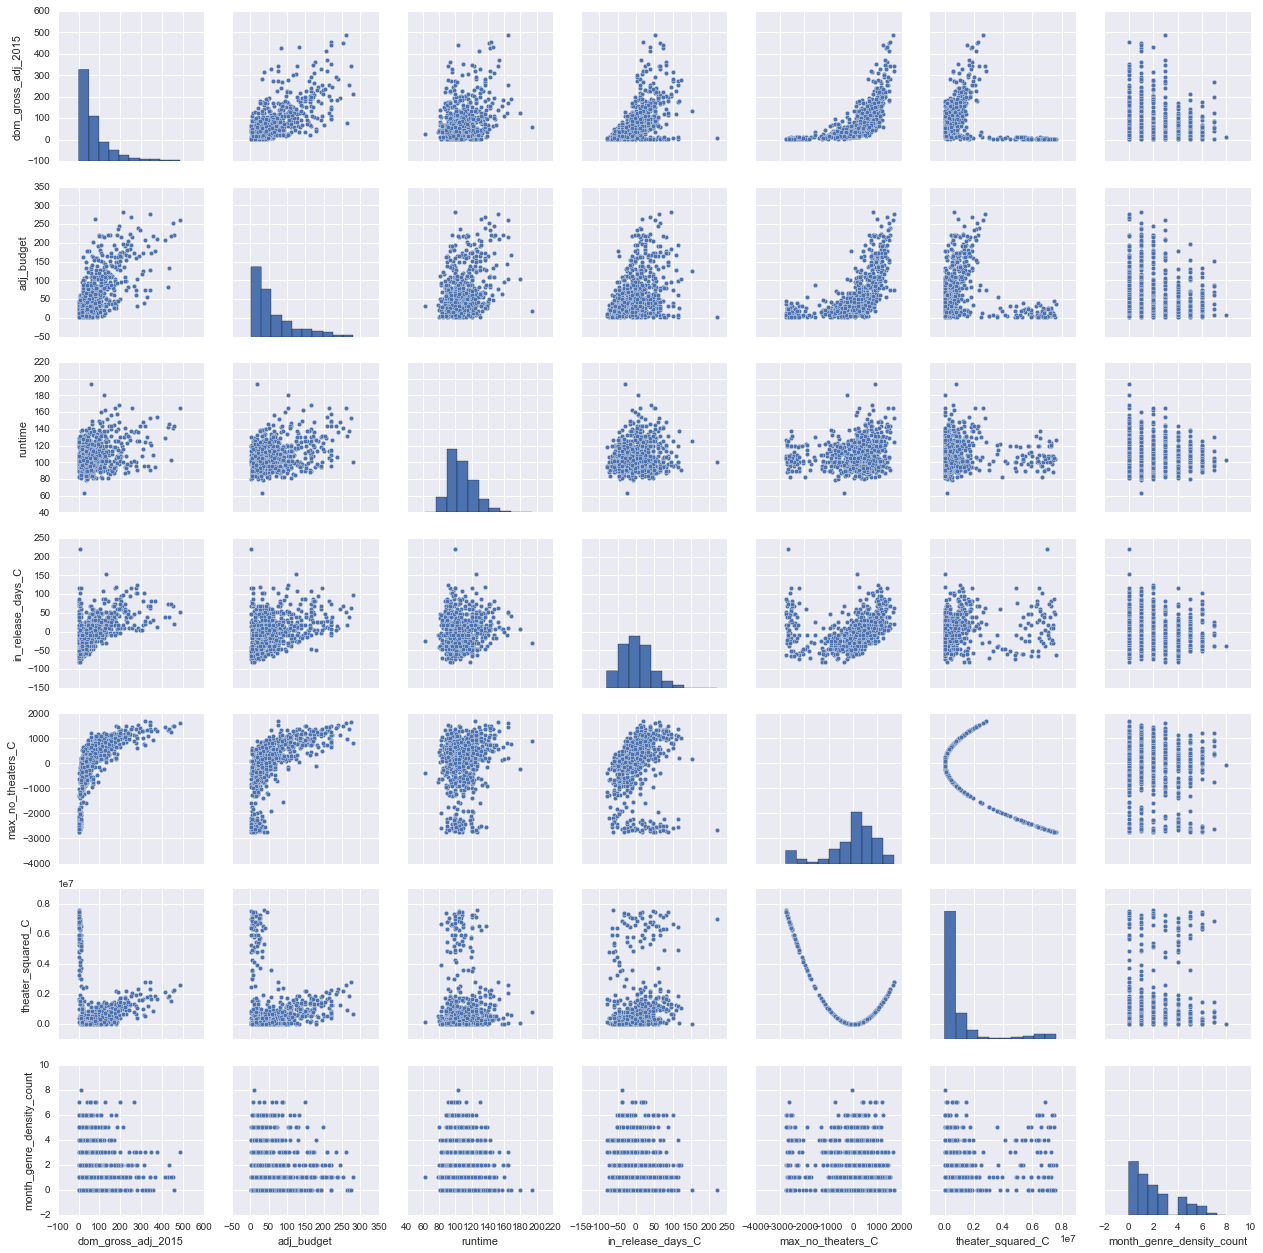

In [441]:
pairDF = DF3[['dom_gross_adj_2015','adj_budget','runtime','in_release_days_C','max_no_theaters_C','theater_squared_C','month_genre_density_count']]
sns.pairplot(pairDF);

# 4.0 Regression Model

In [25]:
##Separate OLS DataFrame
OLSDF = opDF.copy()
OLSDF = OLSDF.drop(['month_budget_density_count','month_basic_density_count','R','G','B','runtime','budget','in_release_days','max_no_theaters','theater_squared'],axis=1)
mask = np.random.random(OLSDF.shape[0])<=1 ##Used 100% of dataset since my interest is in the coefficient not prediction
OLSDF_train = OLSDF[mask]
OLSDF_test = OLSDF[~mask]

In [26]:
OLSDF_train_Y = OLSDF_train.iloc[:,0]
OLSDF_train_X = OLSDF_train.iloc[:,1:]
OLSDF_train_X = statsmodels.tools.tools.add_constant(OLSDF_train_X,prepend=True)

In [43]:
lm = smf.OLS(OLSDF_train_Y,OLSDF_train_X,hasconst=True)
fit = lm.fit()
fit.summary()                 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     dom_gross_adj_2015   R-squared:                       0.733
Model:                            OLS   Adj. R-squared:                  0.719
Method:                 Least Squares   F-statistic:                     52.90
Date:                Fri, 29 Apr 2016   Prob (F-statistic):          2.93e-173
Time:                        11:07:16   Log-Likelihood:                -3767.4
No. Observations:                 732   AIC:                             7609.
Df Residuals:                     695   BIC:                             7779.
Df Model:                          36                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------------------
const                        54.3642      9.311      5.838      0.000        36.082    72.646
adj_budget                    0.3105      0.051      6.119      0.000         0.211     0.410
month_genre_density_count    -2.2124      1.172     -1.888      0.059        -4.513     0.089
Action                        5.2021      7.945      0.655      0.513       -10.397    20.801
Adventure/Fantasy           -27.0834      9.578     -2.828      0.005       -45.889    -8.278
Animation                   -24.8590      8.684     -2.863      0.004       -41.910    -7.808
Comedy                       10.7520      7.721      1.393      0.164        -4.407    25.911
Drama                         6.0831      7.557      0.805      0.421        -8.755    20.921
Family                      -31.1875     10.298     -3.028      0.003       -51.407   -10.968
Horror                        7.5307      8.220      0.916      0.360        -8.608    23.670
Romance                       7.8763      9.218      0.854      0.393       -10.222    25.975
Sci-Fi                       -8.2112      8.360     -0.982      0.326       -24.625     8.203
Thriller                      9.2760      8.729      1.063      0.288        -7.862    26.414
Buena                        -3.4803      8.064     -0.432      0.666       -19.313    12.353
Focus                         3.1190     10.247      0.304      0.761       -16.999    23.237
Fox                         -33.7165      6.698     -5.034      0.000       -46.867   -20.566
Lionsgate                     5.5432      7.493      0.740      0.460        -9.169    20.255
Paramount                     0.7589      7.537      0.101      0.920       -14.039    15.557
Relativity                  -21.3363     10.095     -2.114      0.035       -41.157    -1.515
Sony                        -10.5908      6.165     -1.718      0.086       -22.695     1.514
Universal                     6.6864      6.974      0.959      0.338        -7.006    20.379
Warner                      -17.2133      6.281     -2.740      0.006       -29.546    -4.880
Weinstein                   -27.0233     10.521     -2.569      0.010       -47.679    -6.367
April                        -7.2751      8.271     -0.880      0.379       -23.515     8.965
August                       -0.4428      7.815     -0.057      0.955       -15.788    14.902
December                      4.3634      8.554      0.510      0.610       -12.431    21.158
February                     -2.0568      8.446     -0.244      0.808       -18.639    14.525
July                         -1.3089      8.367     -0.156      0.876       -17.737    15.119
June                         15.0652      8.364      1.801      0.072        -1.357    31.487
March                        -5.9978      8.242     -0.728      0.467      

In [9]:
y_pred = fit.predict(OLSDF_train_X)
y_actual = np.array(OLSDF_train_Y)
error = y_actual - y_pred

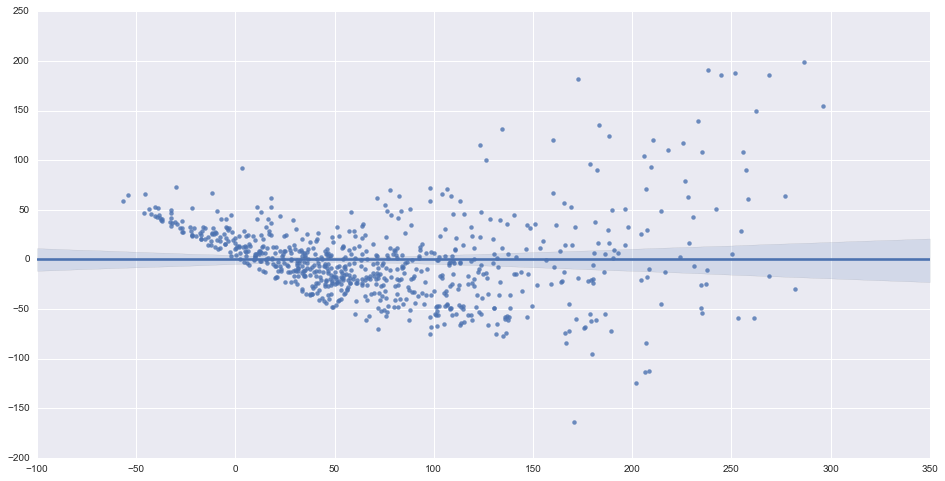

In [19]:
fig, ax = plt.subplots(1,1,figsize=(16,8))
sns.regplot(y_pred,error)
##Signs of heteroskedasticity

In [63]:
##Even under hetero adjusted standard errors, coefficient of interest is still statistically significant
fit2 = lm.fit(cov_type='HC3')
fit2.pvalues

const                        5.279759e-11
adj_budget                   4.346131e-05
month_genre_density_count    6.446184e-02
Action                       5.232748e-01
Adventure/Fantasy            6.588059e-03
Animation                    1.788088e-02
Comedy                       1.407233e-01
Drama                        3.606462e-01
Family                       1.210721e-02
Horror                       2.983419e-01
Romance                      3.723240e-01
Sci-Fi                       3.504537e-01
Thriller                     2.084191e-01
Buena                        7.294820e-01
Focus                        6.922053e-01
Fox                          2.332917e-07
Lionsgate                    4.801594e-01
Paramount                    9.169597e-01
Relativity                   3.301752e-03
Sony                         7.450226e-02
Universal                    2.630935e-01
Warner                       3.351906e-03
Weinstein                    4.361378e-04
April                        2.586

In [455]:
import statsmodels.stats.outliers_influence
for x in range(0,VIFDF.shape[1]):
    print(statsmodels.stats.outliers_influence.variance_inflation_factor(np.array( OLSDF_train_X.iloc[:,1:]),x))

6.92642081426
3.97849389165
3.67698791675
1.49126519477
2.00019464
3.97269827171
2.14052134991
1.36500603517
1.83179785448
1.46040638809
1.81862199121
1.48743476506
1.79757601538
1.2401940519
1.98177814239
1.48043397778
1.65684694494
1.21773705216
1.9416809335
1.71246107678
2.14021562018
1.20701641346
1.67216181369
1.83864781076
1.72578839482
1.63665081321
1.93655095603
1.88952913615
1.76829244865
1.96882494678
1.82632519526
1.8069311784
1.69011199881
6.43052808428
5.72772592826
1.92527014663


##Out of sample test
from sklearn.metrics import r2_score
OLSDF_test_X = OLSDF_test.iloc[:,1:]
OLSDF_test_Y = OLSDF_test.iloc[:,0]
y_pred = fit.predict(OLSDF_test_X)
y_actual = np.array(OLSDF_test_Y)
print("R-squared: ",r2_score(y_actual,y_pred))
print("Adj R-squared: ",1-(1-r2_score(y_actual,y_pred))*(OLSDF_test.shape[0]-1)/(OLSDF_test.shape[0]-OLSDF_test.shape[1]))

# 5.0 Model Refinement

### 5.1 Elastic Net/Lasso Variable Selection

In [462]:
##Copy just to be sure
ENDF = opDF.copy()
ENDF = ENDF.drop(['month_budget_density_count','month_basic_density_count','R','G','B','runtime','budget','in_release_days','max_no_theaters','theater_squared'],axis=1)

In [463]:
##Separate test and validation set 
mask = np.random.random(ENDF.shape[0]) < 1 ##All data to focus on coefficients
ENDF_train = ENDF[mask]
ENDF_test = ENDF[~mask]

In [464]:
##Cross validation on training set
from sklearn.cross_validation import KFold
from sklearn.linear_model import ElasticNet

ENDF_train_X = statsmodels.tools.tools.add_constant(ENDF_train.iloc[:,1:],prepend=True) 
ENDF_train_Y = ENDF_train.iloc[:,0]
x = np.array(ENDF_train_X)
y = np.array(ENDF_train_Y)

kf = KFold(x.shape[0], n_folds = 5)
alphalist = []
SSElist = []
for a in np.arange(0, 1, 0.01):
    SSE = 0
    alphalist.append(a)
    for train_index, test_index in kf:
        x_train, x_test = x[train_index], x[test_index]
        y_train, y_test = y[train_index], y[test_index]
        en = smf.OLS(y_train,x_train).fit_regularized(alpha=a,L1_wt=0.5,maxiter=1000)
        y_pred = en.predict(x_test)
        SSE += ((y_pred - y_test) **2).sum() #sum of squared errors
    SSE = SSE / 5
    SSElist.append(SSE)

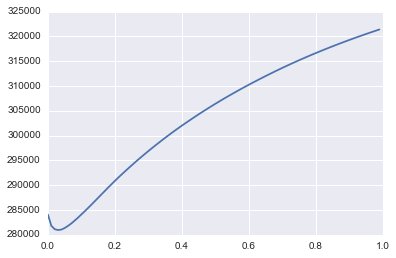

In [465]:
plt.plot(alphalist,SSElist)

In [466]:
optimal_alpha = pd.DataFrame(SSElist,alphalist).sort_values(0).index[0]

In [467]:
model = smf.OLS(ENDF_train_Y,ENDF_train_X).fit_regularized(alpha=optimal_alpha,L1_wt=0.5,maxiter=1000)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     dom_gross_adj_2015   R-squared:                       0.729
Model:                            OLS   Adj. R-squared:                  0.715
Method:                 Least Squares   F-statistic:                     51.90
Date:                Thu, 28 Apr 2016   Prob (F-statistic):          3.40e-171
Time:                        22:45:19   Log-Likelihood:                -3772.5
No. Observations:                 732   AIC:                             7619.
Df Residuals:                     695   BIC:                             7789.
Df Model:                          36                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------------------
const                        38.4796      8.453      4.552      0.000        21.884    55.075
adj_budget                    0.3237      0.051      6.355      0.000         0.224     0.424
month_genre_density_count    -1.4864      1.179     -1.261      0.208        -3.800     0.828
Action                        8.1302      7.966      1.021      0.308        -7.511    23.771
Adventure/Fantasy           -16.2701      9.635     -1.689      0.092       -35.187     2.647
Animation                   -14.5104      8.742     -1.660      0.097       -31.674     2.653
Comedy                       12.3740      7.774      1.592      0.112        -2.890    27.638
Drama                         8.0227      7.605      1.055      0.292        -6.909    22.955
Family                      -17.2749     10.355     -1.668      0.096       -37.606     3.056
Horror                        9.3615      8.269      1.132      0.258        -6.874    25.597
Romance                      10.7845      9.282      1.162      0.246        -7.439    29.008
Sci-Fi                       -2.2135      8.418     -0.263      0.793       -18.742    14.315
Thriller                     10.4475      8.781      1.190      0.235        -6.793    27.688
Buena                         2.5951      8.119      0.320      0.749       -13.346    18.537
Focus                         5.1484     10.316      0.499      0.618       -15.105    25.402
Fox                         -22.6886      6.745     -3.364      0.001       -35.931    -9.446
Lionsgate                    10.3791      7.543      1.376      0.169        -4.431    25.189
Paramount                     6.9778      7.588      0.920      0.358        -7.920    21.876
Relativity                   -8.5460     10.165     -0.841      0.401       -28.504    11.412
Sony                         -2.8798      6.204     -0.464      0.643       -15.061     9.301
Universal                    11.6755      7.020      1.663      0.097        -2.107    25.458
Warner                       -8.3427      6.323     -1.319      0.187       -20.758     4.073
Weinstein                   -12.2069     10.594     -1.152      0.250       -33.007     8.593
April                        -3.1844      7.036     -0.453      0.651       -16.998    10.629
August                        2.3579      6.595      0.358      0.721       -10.590    15.306
December                      5.0359      7.286      0.691      0.490        -9.270    19.342
February                      0.2633      7.318      0.036      0.971       -14.105    14.632
July                               0          0        nan        nan             0         0
June                         14.9600      6.941      2.155      0.031         1.332    28.588
March                        -2.1539      6.955     -0.310      0.757      

##Test set Adj. RSquare
ENDF_test_X = ENDF_test.iloc[:,1:]
ENDF_test_Y = ENDF_test.iloc[:,0]
x_test = np.array(ENDF_test_X)
y_test = np.array(ENDF_test_Y)
y_pred = model.predict(x_test)
y_actual = np.array(y_test)
print("R-squared: ",r2_score(y_actual,y_pred))
print("Adj. R-squared: ",1-(1-r2_score(y_actual,y_pred))*(ENDF_test_X.shape[0]-1)/(ENDF_test_X.shape[0]-ENDF_test_X.shape[1]))

# Appendix: OMDB Data (not used)

In [153]:
title_list = np.array(masterDF['title'])
year_list = np.array(masterDF['release_year'])

In [174]:
from bs4 import BeautifulSoup
import requests
import json
from collections import defaultdict
import time
omdbdict = defaultdict(list)
count = 0
for title,year in zip(title_list,year_list):
    title = re.sub('[^a-z0-9 ]','',title.lower()).replace(' ','+')
    year = str(int(year))
    url = "http://www.omdbapi.com/?t="+title+"&y="+year+"&plot=short&r=json&tomatoes=true"
    count += 1
    if (count == 200) | (count == 400):
        time.sleep(60)
    response = requests.get(url,headers={'Microsoft Edge':'Metis data science student scraping project'})
    soup = BeautifulSoup(response.text)
    newdict = json.loads(soup.text)
    for k,v in newdict.items():
        omdbdict[k].append(v.replace(',',' ').split()[0])        

C:\Users\kennd\Anaconda3\lib\site-packages\bs4\__init__.py:166: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

To get rid of this warning, change this:

 BeautifulSoup([your markup])

to this:

 BeautifulSoup([your markup], "lxml")

  markup_type=markup_type))


In [180]:
OMDBDF = pd.DataFrame(dict([(k,pd.Series(v)) for k,v in omdbdict.items()]))

OMDBDF = OMDBDF.drop(['Production','Website','Rated','DVD','Runtime','Awards','Director','Writer','Language','tomatoConsensus','Actors','Poster','Released','Plot','Error','Genre','tomatoImage','tomatoURL'],axis=1)

OMDBDF